In [3]:
import tensorflow as tf

C:\Users\Biswajeet\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000024B63BA5F98>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000024B66714438>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000024B66714518>)

In [7]:
mnist.train.images.shape, mnist.train.labels.shape

((55000, 784), (55000, 10))

In [8]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [9]:
mnist.test.images.shape, mnist.test.labels.shape

((10000, 784), (10000, 10))

In [10]:
mnist.validation.images.shape

(5000, 784)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

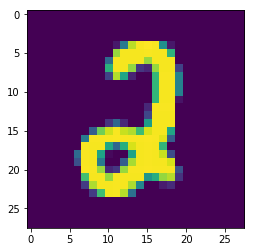

In [12]:
first_image = mnist.train.images[415]
first_image = np.array(first_image, dtype='float')
first_image = first_image.reshape((28,28))
plt.imshow(first_image)
plt.show()

In [13]:
with tf.Session() as sess:
    print(tf.random_normal([784, 256]).eval())

[[-0.5705064  -0.37455508  0.94942445 ... -0.37970853 -0.67339855
   0.92359036]
 [-0.67171675 -1.2697792   0.5125636  ... -2.5182931   0.6561958
   0.33670104]
 [ 0.01258413  0.10498685 -1.7774228  ... -0.64999425  0.68901455
  -1.066761  ]
 ...
 [ 1.3077601   0.28556296  0.3821897  ...  1.0244348   0.9780593
   0.70345664]
 [ 1.5445607  -0.26838332  1.6499871  ...  2.2503476   0.0244909
  -1.6237227 ]
 [ 2.713265   -1.1838963  -0.47746277 ... -1.3179693   0.99629664
   1.3913441 ]]


In [14]:
# weights & biases
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [15]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    return output